# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [46]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [47]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [48]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [49]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [50]:
from sklearn.model_selection import train_test_split

X = data.drop('MEDV', axis=1)

y = data['MEDV']

X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [53]:
from sklearn.linear_model import LinearRegression
model_linear_housing = LinearRegression()

model_linear_housing.fit(X_train_housing, y_train_housing)

y_train_pred_linear_housing = model_linear_housing.predict(X_train_housing)

y_test_pred_linear_housing = model_linear_housing.predict(X_test_housing)



## 3. Calculate and print R-squared for both the training and the testing set.

In [55]:
from sklearn.metrics import r2_score

r_squared_training_linear_housing = r2_score(y_train_housing, y_train_pred_linear_housing)

r_squared_testing_linear_housing = r2_score(y_test_housing, y_test_pred_linear_housing)


r_squared_training_linear_housing, r_squared_testing_linear_housing

(0.7508856358979673, 0.6687594935356317)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [57]:
from sklearn.metrics import mean_squared_error

MSE_training_linear_housing = mean_squared_error(y_train_housing, y_train_pred_linear_housing)

MSE_testing_linear_housing = mean_squared_error(y_test_housing, y_test_pred_linear_housing)

MSE_training_linear_housing, MSE_testing_linear_housing

(21.641412753226312, 24.291119474973538)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [58]:
from sklearn.metrics import mean_absolute_error

MAE_training_linear_housing = mean_absolute_error(y_train_housing, y_train_pred_linear_housing)

MAE_testing_linear_housing = mean_absolute_error(y_test_housing, y_test_pred_linear_housing)

MAE_training_linear_housing, MAE_testing_linear_housing

(3.3147716267832252, 3.1890919658878416)

## Classification Model Evaluation

In [59]:
from sklearn.datasets import load_iris
data = load_iris()

In [60]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [61]:
column_names = data.feature_names

In [62]:
df = pd.DataFrame(data['data'],columns=column_names)

In [63]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
target = pd.DataFrame(data.target)

In [65]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [66]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [67]:
X = df

y = target

X_train_flower, X_test_flower, y_train_flower, y_test_flower = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [68]:
from sklearn.linear_model import LogisticRegression

model_regression_flowers = LogisticRegression()

model_regression_flowers.fit(X_train_flower, y_train_flower)

LogisticRegression()

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [69]:
from sklearn.metrics import accuracy_score
y_train_pred_flower_regression = model_regression_flowers.predict(X_train_flower)

print("Training set accuracy score:", accuracy_score(y_train_flower, y_train_pred_flower_regression))

y_test_pred_flower_regression = model_regression_flowers.predict(X_test_flower)

print("Testing set accuracy score:", accuracy_score(y_test_flower, y_test_pred_flower_regression))


Training set accuracy score: 0.975
Testing set accuracy score: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [70]:
from sklearn.metrics import balanced_accuracy_score

print("Training set balanced accuracy score:", balanced_accuracy_score(y_train_flower, y_train_pred_flower_regression))

print("Testing set balanced accuracy score:", balanced_accuracy_score(y_test_flower, y_test_pred_flower_regression))

Training set balanced accuracy score: 0.975609756097561
Testing set balanced accuracy score: 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [71]:
from sklearn.metrics import precision_score

print("Training set precision score:", precision_score(y_train_flower, y_train_pred_flower_regression, average='weighted'))

print("Testing set precision score:", precision_score(y_test_flower, y_test_pred_flower_regression, average='weighted'))

Training set precision score: 0.9767857142857144
Testing set precision score: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [72]:
from sklearn.metrics import recall_score

print("Training set recall score:", recall_score(y_train_flower, y_train_pred_flower_regression, average='weighted'))

print("Testing set recall score:", recall_score(y_test_flower, y_test_pred_flower_regression, average='weighted'))

Training set recall score: 0.975
Testing set recall score: 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [73]:
from sklearn.metrics import f1_score

print("Training set F1 score:", f1_score(y_train_flower, y_train_pred_flower_regression, average='weighted'))

print("Testing set F1 score:", f1_score(y_test_flower, y_test_pred_flower_regression, average='weighted'))

Training set F1 score: 0.9749882794186592
Testing set F1 score: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

In [74]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix for training set:", confusion_matrix(y_train_flower, y_train_pred_flower_regression))

print("Confusion matrix for testing set:", confusion_matrix(y_test_flower, y_test_pred_flower_regression))

Confusion matrix for training set: [[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]
Confusion matrix for testing set: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

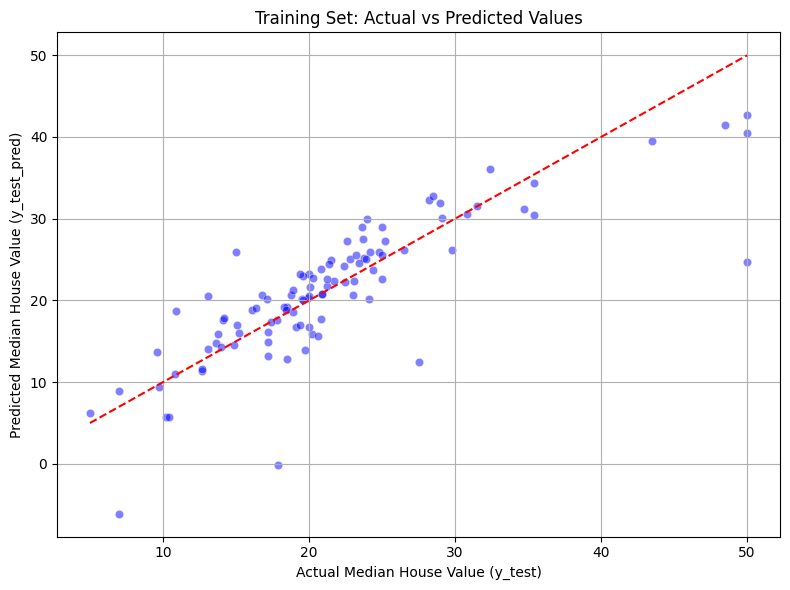

In [81]:
#For housing data set:

# First I am going to plot the linear regression, to evaluate the fit of the model: 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_housing, y=y_test_pred_linear_housing, alpha=0.5, color='blue')

# Add 45-degree reference line (perfect prediction)
plt.plot([y_test_housing.min(), y_test_housing.max()], [y_test_housing.min(), y_test_housing.max()], color='red', linestyle='--')

plt.xlabel("Actual Median House Value (y_test)")
plt.ylabel("Predicted Median House Value (y_test_pred)")
plt.title("Training Set: Actual vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Import all linear regression models we've learned so far and add them to a dictionary (models_regression) that will store all models: 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor #importing regressor as house value is a continuous value, not categorical
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

models_regression = {
    "LinearRegression" : LinearRegression(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "SVR" : SVR()
}

# Create a dictionary to store the accuracy results for each of the models.
accuracy_results = {}

# Iterate with a for loop through all the models we want to test, fitting each model and calculating both training and testing data set predictions. 
# Also, for each model we will calculate MSE and r2, to analyze the accuracy of the model and be able to compare them to select the best fit. 

for name, model in models_regression.items():
    model.fit(X_train_housing, y_train_housing)
    y_train_pred = model.predict(X_train_housing)
    y_test_pred = model.predict(X_test_housing)

    mse_train = mean_squared_error(y_train_housing, y_train_pred)
    mse_test = mean_squared_error(y_test_housing, y_test_pred)
    r2_train = r2_score(y_train_housing, y_train_pred)
    r2_test = r2_score(y_test_housing, y_test_pred)

    accuracy_results[name] = {
        "Training MSE" : mse_train,
        "Testing MSE" : mse_test,
        "Training r_squared" : r2_train,
        "Testing r_squared" : r2_test
    }

In [ ]:
#Create a dataframe to store the accuracy results for each of the models and sort the results based on r_squared testing value (descending):

housing_results = pd.DataFrame(accuracy_results).T
print(housing_results.sort_values("Testing r_squared", ascending=False))

                       Training MSE  Testing MSE  Training r_squared  \
RandomForestRegressor      1.879608     9.371653            0.978364   
DecisionTreeRegressor      0.000000     9.377941            1.000000   
LinearRegression          21.641413    24.291119            0.750886   
KNeighborsRegressor       27.458911    25.860125            0.683920   
SVR                       70.771497    52.838366            0.185349   

                       Testing r_squared  
RandomForestRegressor           0.872206  
DecisionTreeRegressor           0.872120  
LinearRegression                0.668759  
KNeighborsRegressor             0.647364  
SVR                             0.279481  


In [ ]:
#Create a dataframe to store the accuracy results for each of the models and sort the results based on MSE testing value (ascending, as the higher the value of MSE, the worse):

housing_results = pd.DataFrame(accuracy_results).T
print(housing_results.sort_values("Testing MSE", ascending=True))

                       Training MSE  Testing MSE  Training r_squared  \
RandomForestRegressor      1.879608     9.371653            0.978364   
DecisionTreeRegressor      0.000000     9.377941            1.000000   
LinearRegression          21.641413    24.291119            0.750886   
KNeighborsRegressor       27.458911    25.860125            0.683920   
SVR                       70.771497    52.838366            0.185349   

                       Testing r_squared  
RandomForestRegressor           0.872206  
DecisionTreeRegressor           0.872120  
LinearRegression                0.668759  
KNeighborsRegressor             0.647364  
SVR                             0.279481  


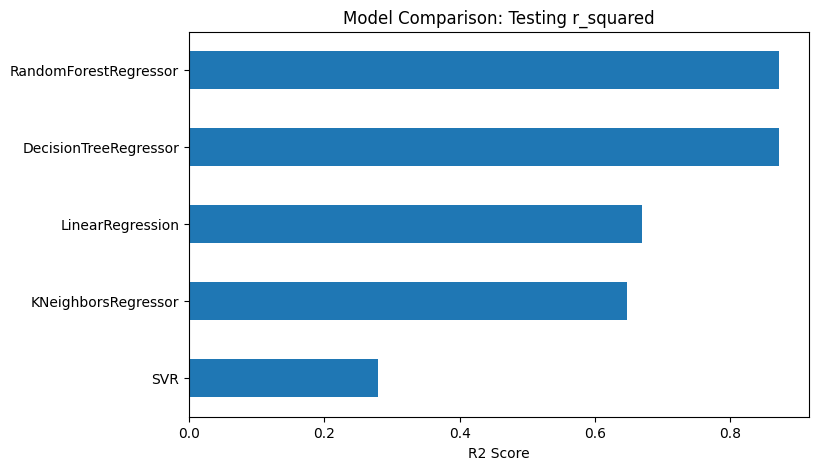

In [ ]:
#Plotting the comparison of testing r_squared of each model in a bar chart. 

housing_results["Testing r_squared"].sort_values().plot(kind='barh', figsize=(8, 5), title="Model Comparison: Testing r_squared")
plt.xlabel("R2 Score")
plt.show()

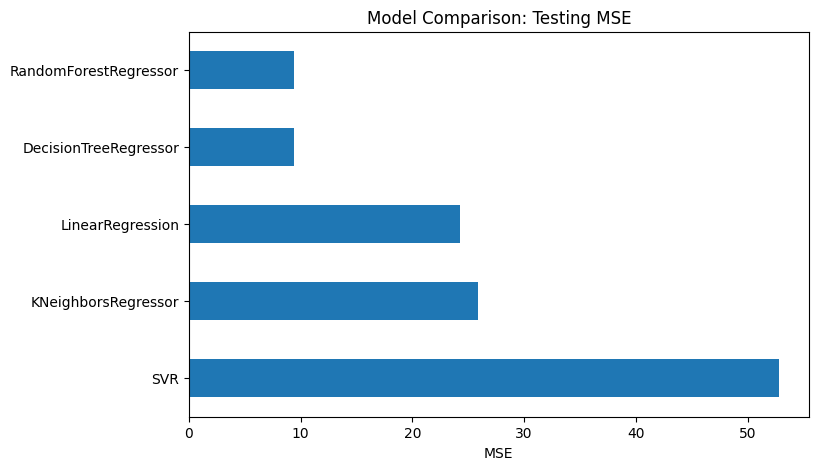

In [ ]:
#Plotting the comparison of testing MSE of each model in a bar chart. 

housing_results["Testing MSE"].sort_values(ascending=False).plot(kind='barh', figsize=(8, 5), title="Model Comparison: Testing MSE")
plt.xlabel("MSE")
plt.show()

In [92]:
#Overall, we can see that the best model to use for the housing dataset is the RandomForestRegressor, as it leads to the best accuracy results. 


In [93]:
# Now, let's try the same but for the flowers dataset:

In [94]:
#Need to scale the flowers data set for the SVM model:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_flower_scaled = scaler.fit_transform(X_train_flower)

X_test_flower_scaled = scaler.transform(X_test_flower)

In [95]:
# Import all classification regression models we've learned so far and add them to a dictionary (models_regression) that will store all models: 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models_classification = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "SVM" : SVC(),
    "Naive Bayes" : GaussianNB()
}

# Create a dictionary to store the accuracy results for each of the models.
accuracy_results_flowers = {}

# Iterate with a for loop through all the models we want to test, fitting each model and calculating both training and testing data set predictions. 
# Also, for each model we will calculate MSE and r2, to analyze the accuracy of the model and be able to compare them to select the best fit. 

for name, model in models_classification.items():
    
    # Use scaled features only for SVM
    if name in ["SVM"]:
        model.fit(X_train_flower_scaled, y_train_flower)
        y_train_pred_flower = model.predict(X_train_flower_scaled)
        y_test_pred_flower = model.predict(X_test_flower_scaled)
    else:
        model.fit(X_train_flower, y_train_flower)
        y_train_pred_flower = model.predict(X_train_flower)
        y_test_pred_flower = model.predict(X_test_flower)

#Gonna ommit trianing metrics in this case, only consider testing dataset accuracy metrics.
    accuracy_results_flowers[name] = {
        "Accuracy": accuracy_score(y_test_flower, y_test_pred_flower),
        "Precision": precision_score(y_test_flower, y_test_pred_flower, average='weighted'),
        "Recall": recall_score(y_test_flower, y_test_pred_flower, average='weighted'),
        "F1 Score": f1_score(y_test_flower, y_test_pred_flower, average='weighted'),
        "Balanced Accuracy": balanced_accuracy_score(y_test_flower, y_test_pred_flower)
    }

In [97]:
flowers_results = pd.DataFrame(accuracy_results_flowers).T
print(flowers_results.sort_values("Balanced Accuracy", ascending=False))

                        Accuracy  Precision  Recall  F1 Score  \
LogisticRegression           1.0        1.0     1.0       1.0   
DecisionTreeClassifier       1.0        1.0     1.0       1.0   
RandomForestClassifier       1.0        1.0     1.0       1.0   
KNeighborsClassifier         1.0        1.0     1.0       1.0   
SVM                          1.0        1.0     1.0       1.0   
Naive Bayes                  1.0        1.0     1.0       1.0   

                        Balanced Accuracy  
LogisticRegression                    1.0  
DecisionTreeClassifier                1.0  
RandomForestClassifier                1.0  
KNeighborsClassifier                  1.0  
SVM                                   1.0  
Naive Bayes                           1.0  


In [98]:
#In this case, we can see that all models lead to the same result, as it is a perfect score for all accuracy metrics, regardless of the model selected. Therefore, all models will be a good option for this dataset. 